## iris数据集

鸢尾花（iris）数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

In [17]:
import seaborn as sns
from pandas import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [14]:
# 加载数据集
data = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns = data.feature_names)
# 添加品种列
df['Species'] = data.target
# 查看数据集信息
print(f"数据集信息：\n{df.info()}")
# 查看前5条数据
print(f"前5条数据：\n{df.head()}")
# 查看各特征列的摘要信息
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
数据集信息：
None
前5条数据：
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


通过[Violinplot](https://zhuanlan.zhihu.com/p/376055263)和 Pointplot，分别从数据分布和斜率，观察各特征与品种之间的关系

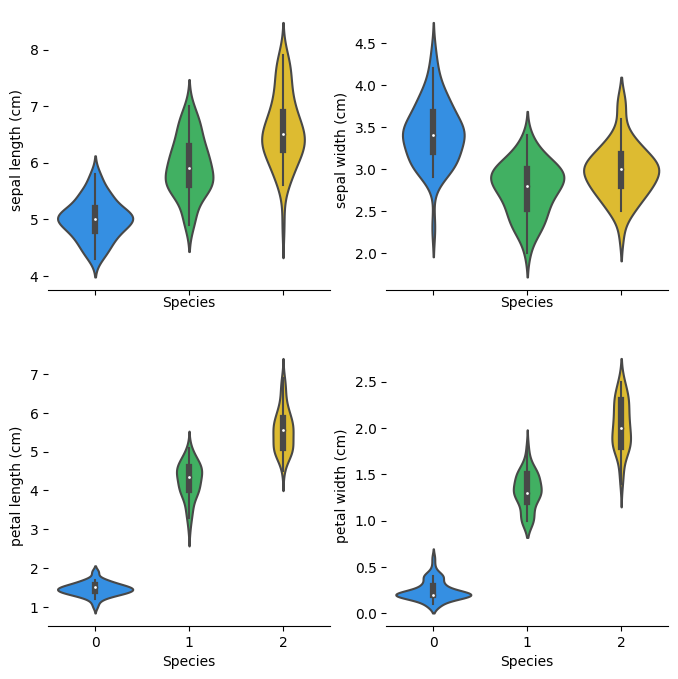

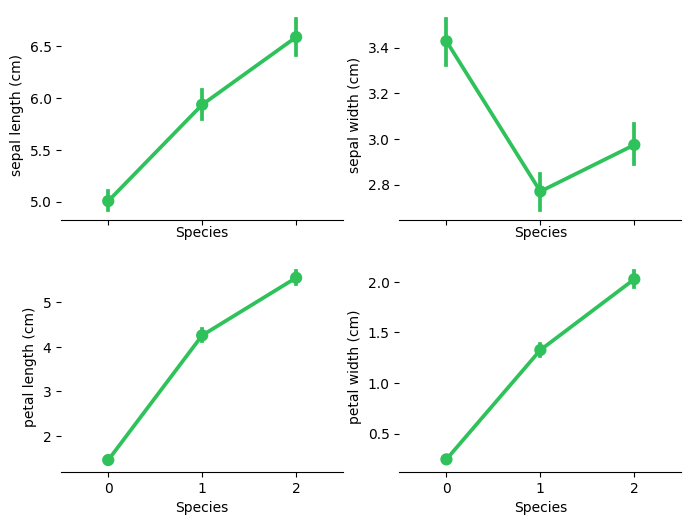

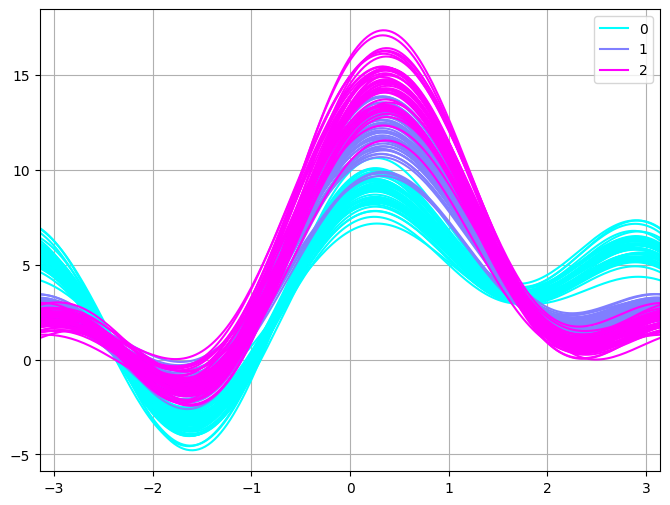

In [15]:
# 设置颜色主题
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 
# 绘制violinplot
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True) # 删除上方和右方坐标轴上不需要的边框，这在matplotlib中是无法通过参数实现的
sns.violinplot(x='Species', y=df.columns[0], data=df, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y=df.columns[1], data=df, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y=df.columns[2], data=df, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y=df.columns[3], data=df, palette=antV, ax=axes[1, 1])
plt.show()
# 绘制pointplot
f, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True)
sns.despine(left=True)
sns.pointplot(x='Species', y=df.columns[0], data=df, color=antV[1], ax=axes[0, 0])
sns.pointplot(x='Species', y=df.columns[1], data=df, color=antV[1], ax=axes[0, 1])
sns.pointplot(x='Species', y=df.columns[2], data=df, color=antV[1], ax=axes[1, 0])
sns.pointplot(x='Species', y=df.columns[3], data=df, color=antV[1], ax=axes[1, 1])
plt.show()
# g = sns.pairplot(data=df, palette=antV, hue= 'Species')
# 安德鲁曲线
plt.subplots(figsize = (8,6))
plotting.andrews_curves(df, 'Species', colormap='cool')

plt.show()

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



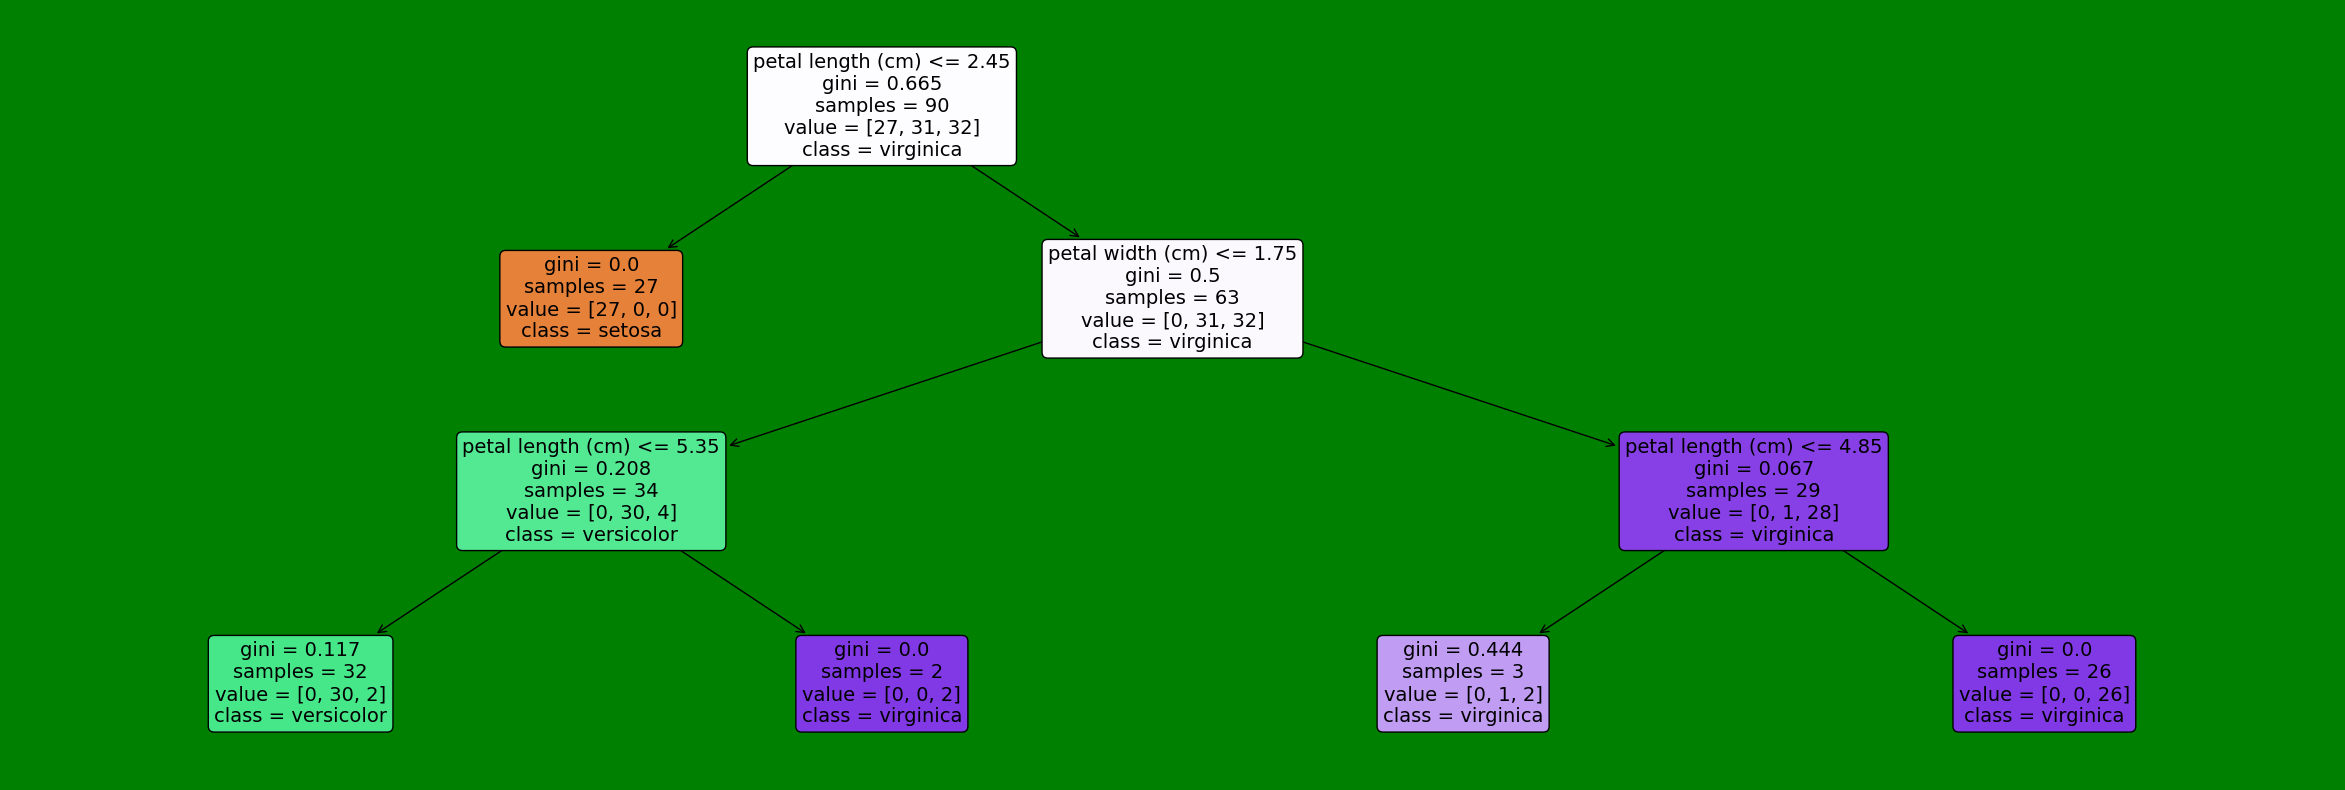

In [21]:
# 加载数据集
data = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(data.data, columns = data.feature_names)
# 添加品种列
df['Species'] = data.target

# 用数值替代品种名作为标签
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

X_train, test_x, y_train, test_lab = train_test_split(X,y,
                                                 test_size = 0.4,
                                                 random_state = 42)
model = DecisionTreeClassifier(max_depth =3, random_state = 42)
model.fit(X_train, y_train) 
# 以文字形式输出树     
text_representation = tree.export_text(model)
print(text_representation)
# 用图片画出
plt.figure(figsize=(30,10), facecolor ='g') #
a = tree.plot_tree(model,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()                                          